In [1]:
import os
import h5py
import sklearn.datasets
import pandas as pd
import numpy as np
from Bio import SeqIO
from utils.general import LOCALIZATION
import seaborn as sns
sns.set(style='white', rc={'figure.figsize':(14,10)})
from tqdm import tqdm
import umap

c:\users\hannesstark\anaconda3\envs\bio\lib\site-packages\umap\__init__.py:9: UserWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn("Tensorflow not installed; ParametricUMAP will be unavailable")


In [2]:
embeddings_file = h5py.File(os.path.join('data/embeddings', 'train_T5_reduced.h5'), 'r')
embeddings = []
labels = []
for record in tqdm(SeqIO.parse(open('data/fasta_files/train.fasta'), 'fasta')):
    if len(record.seq) < 13000:
        embeddings.append(embeddings_file[str(record.description)][:])

        localization = record.description.split(' ')[1].split('-')[0]
        labels.append(localization)# get localization as integer
    else:
        print(record.description)
embeddings = np.array(embeddings)
labels = np.array(labels)

9503it [00:02, 3290.98it/s]


In [3]:
mapper = umap.UMAP().fit(embeddings)

<AxesSubplot:>

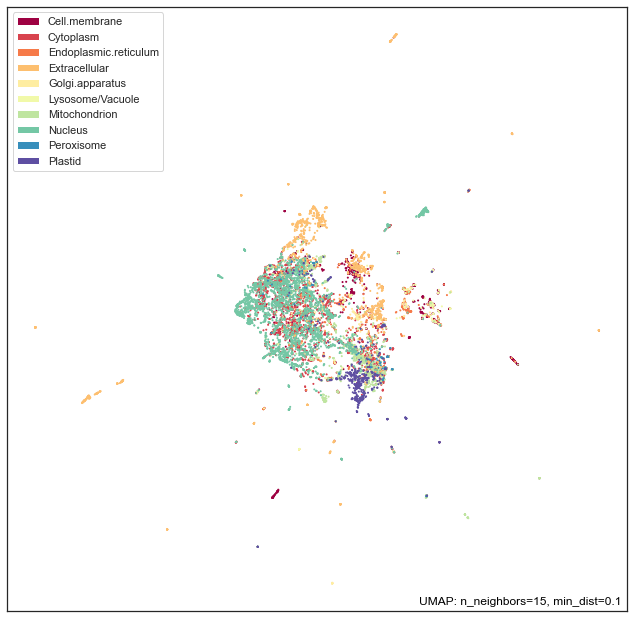

In [4]:
import umap.plot
umap.plot.points(mapper, labels=labels)